<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Geophysikalisches Praktikum: geodyn5 format

## Reading and understanding the geodyn5 format
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*



In this notebook, we will discuss and then read a data file (topography) saved in the `geodyn5` format.
<img src="images/BlaueKuppe_2Dtopo.png" style="height:10cm">

First, we load some `python` libraries.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.interpolate

----
## Reading a geodyn5 file

Our first script will be used to **read** a dataset of digital elevations, 
which has been saved in the geodyn5 format. Below, the first lines from the
file `2Dm_GP2022_DTM.xy` are shown:

In [10]:
!ls data/2Dm*

data/2Dm_GP2018_GRAV_BK11.xy data/2Dm_GP2022_DTM.xy
data/2Dm_GP2018_GRAV_BK12.xy data/2Dm_GP2022_MAG_M01.xy
data/2Dm_GP2018_GRAV_BK13.xy data/2Dm_GP2022_MAG_M02.xy
data/2Dm_GP2018_GRAV_BK14.xy


The first lines (starting with an exclamation mark) are **meta-data** of the dataset,
describing its content, technial details such as the source, the coordinate system:
- !PROJECT - project name
- !DATA:        - name of dtaa set
- !OPERATOR: - operator names
- !DATE:   - date of data set (creation)
- !COORDINATES: - coordinates
- !NOTES:       - note 

This link is not exclusive, you can assign your own meta-data, as long as they start with an exclamation mark.

The last two rows of meta-data describe the structure of the following data set, the `geodyn5` dataset.
The column entries for the dtaa set (mandatory) are:
- datetime - datetime string for data point [yyyy-mm-dd-hh:mm:ss]
- easting  - easting coordinate [m]
- northing - northing coordinate [m]
- elev     - elevation [m]
- depth    - sensor offset to ground [m]
- field1   - field value1 [m,mGal,nT,...]
- field2   - field value2 [m,mGal,nT,...]

We will read this data file with the following script below.

We open the data file (in the data directiry) as `infile1`, read all content into the
variable `lines`, then loop over all lines stored in `lines`and sort for meta-data and data.

- meta-data: are printed as info
- data: each data line is splitted into parts and saved as `python` list for
the lists datetime, easting, northing, elev, offset, field1, field2.


In [11]:
infile1 = 'data/2Dm_GP2022_DTM.xy'
file1 = open(infile1, 'r')
lines = file1.readlines()
file1.close()

In [12]:
print(len(lines))
for line in range(20):
    print(lines[line],end="")

22509
!PROJECT:     Praktikum2022_BlaueKuppe
!LOCATION:    Blaue Kuppe, Eschwege
!DATA:        SRTM1
!OPERATOR:    
!DATE:
!COORDINATES: UTM 32T
!NOTES:       10m resolution (resampled)
!VALUE:     datetime    easting    northing    elev    depth        field1        field2
!UNIT:                      [m]         [m]     [m]      [m]           [x]          [xx]
2022-08-17-12:00:00   571505.42  5668497.78  221.00     0.00          0.00          0.00
2022-08-17-12:00:00   571515.42  5668497.78  221.00     0.00          0.00          0.00
2022-08-17-12:00:00   571525.42  5668497.78  221.00     0.00          0.00          0.00
2022-08-17-12:00:00   571535.42  5668497.78  222.00     0.00          0.00          0.00
2022-08-17-12:00:00   571545.42  5668497.78  222.00     0.00          0.00          0.00
2022-08-17-12:00:00   571555.42  5668497.78  222.00     0.00          0.00          0.00
2022-08-17-12:00:00   571565.42  5668497.78  222.00     0.00          0.00          0.00
2022-08-17-12

Define single array `add` with three entries, 
define empty array `topo` (0x3), add single array `add` to `topo`.

In [13]:
add=np.array([[571505.42,5668497.78,221.00]])
print(add)

[[5.71505420e+05 5.66849778e+06 2.21000000e+02]]


In [14]:
topo = np.empty((0,3))
print(topo,topo.ndim,topo.shape)

[] 2 (0, 3)


Repeat the following statement several times ...

In [17]:
topo = np.append(topo,add,axis=0)
print(topo,topo.ndim,topo.shape)

[[5.71505420e+05 5.66849778e+06 2.21000000e+02]
 [5.71505420e+05 5.66849778e+06 2.21000000e+02]
 [5.71505420e+05 5.66849778e+06 2.21000000e+02]] 2 (3, 3)


Now read in topography data from geodyn5 formatted file ...

In [18]:
imeta=0; idata=0
datetime =[]
topo = np.empty((0,3))
print(topo.shape)

for line in lines:
    # Get next line from file
    if (line[0] == '!'):
        imeta += 1
        print(line.split())
    else:
        idata += 1
        add  = np.array([[float(line.split()[1]),float(line.split()[2]),float(line.split()[3])]])
        topo = np.append(topo,add,axis=0)
        datetime.append(line.split()[0])

print('Number of meta-data lines: ',imeta)
print('Number of data lines:      ',idata)
print('Number of data points:     ',topo.shape)
print('min/max elevation:         ',topo[:,2].min(),topo[:,2].max())

(0, 3)
['!PROJECT:', 'Praktikum2022_BlaueKuppe']
['!LOCATION:', 'Blaue', 'Kuppe,', 'Eschwege']
['!DATA:', 'SRTM1']
['!OPERATOR:']
['!DATE:']
['!COORDINATES:', 'UTM', '32T']
['!NOTES:', '10m', 'resolution', '(resampled)']
['!VALUE:', 'datetime', 'easting', 'northing', 'elev', 'depth', 'field1', 'field2']
['!UNIT:', '[m]', '[m]', '[m]', '[m]', '[x]', '[xx]']
Number of meta-data lines:  9
Number of data lines:       22500
Number of data points:      (22500, 3)
min/max elevation:          215.0 323.0


----
## Plotting topography

We first need to create a regular grid from irregular data:
- Define spacing `dx` and `dy`.
- Calculate number of points in east ans north direction, `nx`, `ny`
- create `x` and `y` arrays
- Re-mesh these two array to 2D arrays

In [19]:
dx = 10.; dy =10.
nx = (max(topo[:,0])-min(topo[:,0]))/dx + 1
ny = (max(topo[:,1])-min(topo[:,1]))/dy + 1
print(nx,ny)
x = np.linspace(min(topo[:,0]),max(topo[:,0]),int(nx))
y = np.linspace(min(topo[:,1]),max(topo[:,1]),int(ny))

X,Y = np.meshgrid(x,y)
#Z = scipy.interpolate.griddata ((topo[:,0],topo[:,1]),topo[:,2],(X,Y), method='linear')
Z = scipy.interpolate.griddata ((topo[:,0],topo[:,1]),topo[:,2],(X,Y), method='nearest')
print(Z.min(),Z.max())

150.0 150.0
215.0 323.0


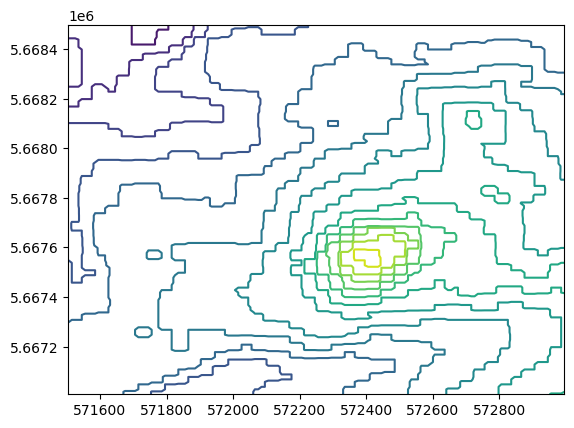

In [20]:
plt.contour(X,Y,Z,15)

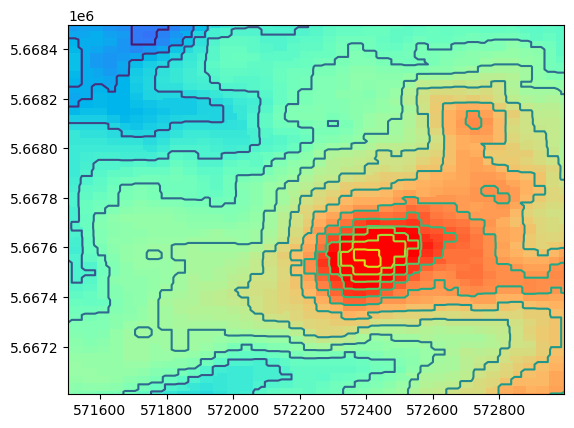

In [21]:
plt.contour(X,Y,Z,15)
plt.pcolormesh(X,Y,Z,cmap=plt.get_cmap('rainbow'),vmin=200,vmax=300)

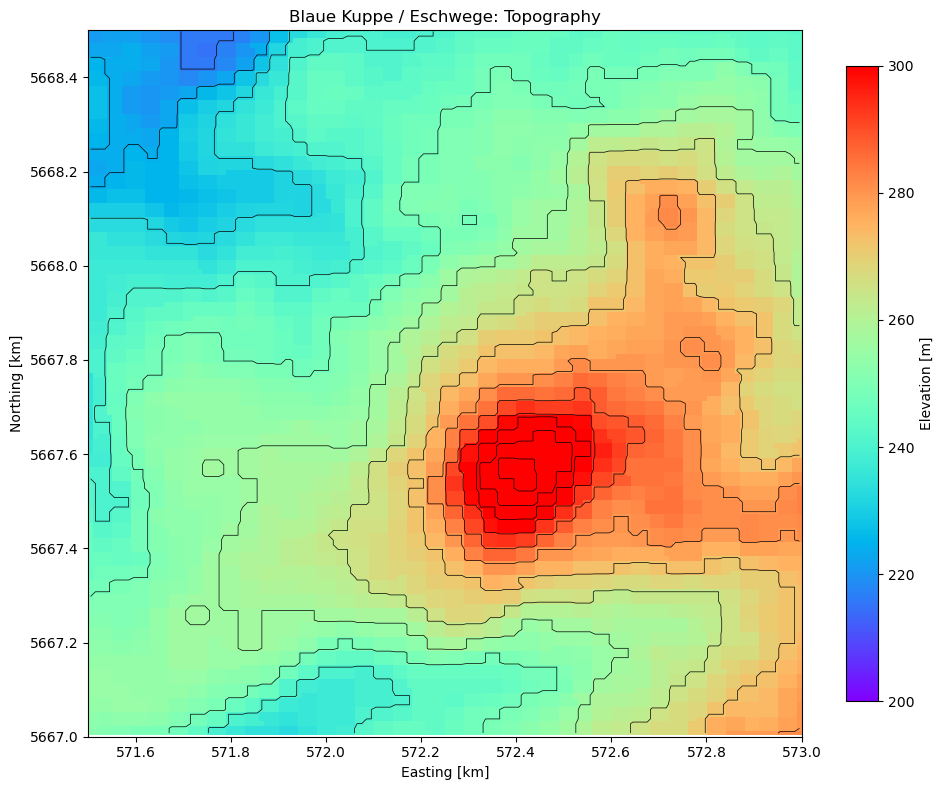

In [22]:
fig,ax1 = plt.subplots(1,1,figsize=(10.0, 8.0))

ax1.set_xlabel('Easting [km]')
ax1.set_ylabel('Northing [km]')
ax1.set_title('Blaue Kuppe / Eschwege: Topography')
ax1.ticklabel_format(useOffset=False)

ax1.contour(X/1000, Y/1000, Z, 15, linewidths = 0.5, colors = 'k')
im=ax1.pcolormesh(X/1000, Y/1000, Z, cmap = plt.get_cmap('rainbow'),shading='auto',vmin=200,vmax=300)

cbar=fig.colorbar(im,ax=ax1,shrink=0.9)
cbar.set_label('Elevation [m]', rotation=90)

ax1.set_xlim([571.500,573.000])
ax1.set_ylim([5667.000,5668.500])
plt.tight_layout()
plt.savefig("images/BlaueKuppe_2Dtopo.png")

... done